<a href="https://colab.research.google.com/github/Shivam7645/Brain-Tumor-Detection-Using-Machine-Learning/blob/main/Brain_Tumer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Done


  0%|          | 0/155 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

Displaying 10 images with tumor:


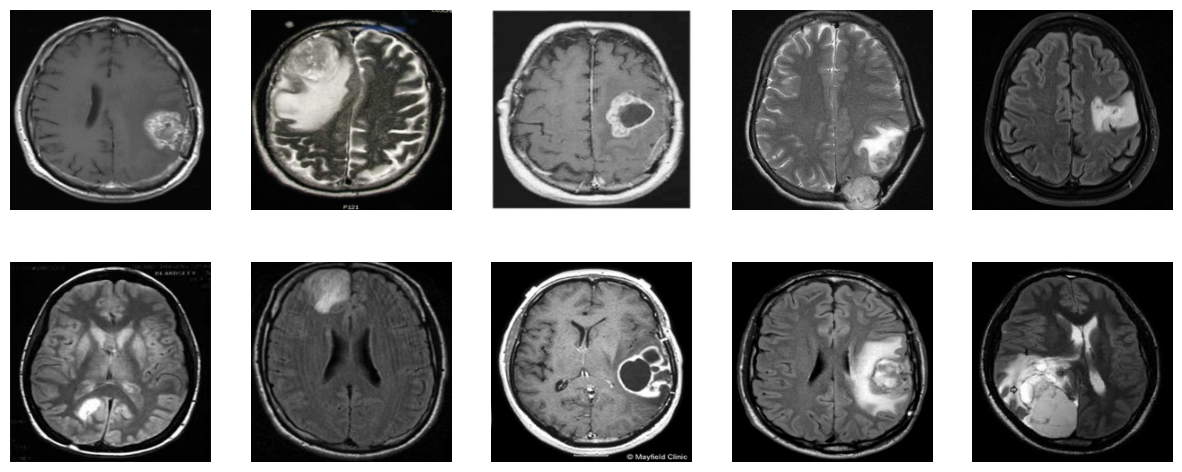

Shape of an image in X_train:  (224, 224, 3)
Shape of an image in X_test:  (224, 224, 3)
X_train Shape:  (169, 224, 224, 3)
X_test Shape:  (84, 224, 224, 3)
y_train Shape:  (169, 2)
y_test Shape:  (84, 2)
3/3 [==============================] - 8s 2s/step
Number of rows and columns in train_features: (169, 62721)
Number of rows and columns in test_features: (84, 62721)
Test Accuracy: 0.8928571428571429
Shape of original train data: (169, 62721)
Shape of original test data: (84, 62721)
Shape of train features: (169, 62721)
Shape of test features: (84, 62721)

First few rows of original train data:
          0         1         2         3         4         5         6  \
0  2.344067 -0.150839 -0.271606  0.589285  0.458789  0.816823 -0.053777   
1  0.644452 -0.115276 -0.207195 -0.262371 -0.223747 -0.275618 -0.060835   
2 -0.222934 -0.126307 -0.278453 -0.254040 -0.223958 -0.154869 -0.036668   
3  0.200572 -0.088289 -0.184229 -0.278460 -0.247099 -0.265682 -0.045569   
4  0.991894 -0.075511 

In [ ]:
import tensorflow as tf
from zipfile import ZipFile
import os
import cv2
from tqdm.notebook import tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.applications import efficientnet
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Upload kaggle.json if not already done

file_name = "/content/archive (6).zip"
with ZipFile(file_name, 'r') as zip:
    zip.extractall()
    print('Done')

X = []
y = []

# Load images from '/content/yes' directory
os.chdir('/content/yes')
for i in tqdm(os.listdir()):
    img = cv2.imread(i)
    if img is not None:  # Check if img is not None
        img = cv2.resize(img, (224, 224))
        X.append(img)
        y.append(1)  # Assign label 1 for 'yes' class
    else:
        print(f"Error loading image: {i}")

# Load images from '/content/no' directory
os.chdir('/content/no')
for i in tqdm(os.listdir()):
    img = cv2.imread(i)
    if img is not None:  # Check if img is not None
        img = cv2.resize(img, (224, 224))
        X.append(img)
        y.append(0)  # Assign label 0 for 'no' class
    else:
        print(f"Error loading image: {i}")

# Display 10 images with tumor
print("Displaying 10 images with tumor:")
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    if y[i] == 1:
        ax.imshow(X[i])
        ax.axis('off')
plt.show()

# Prepare data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print("Shape of an image in X_train: ", X_train[0].shape)
print("Shape of an image in X_test: ", X_test[0].shape)

le = preprocessing.LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
y_train_one_hot = tf.keras.utils.to_categorical(y_train_encoded, num_classes=2)
y_test_one_hot = tf.keras.utils.to_categorical(y_test_encoded, num_classes=2)
y_train_one_hot = np.array(y_train_one_hot)
X_train = np.array(X_train)
y_test_one_hot = np.array(y_test_one_hot)
X_test = np.array(X_test)
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train_one_hot.shape)
print("y_test Shape: ", y_test_one_hot.shape)

# Feature extraction using EfficientNetB0
def extract_features(X):
    model = efficientnet.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    features = model.predict(X)
    return features

# Extract features from images
X_train_features = extract_features(X_train)
X_test_features = extract_features(X_test)

# Flatten the feature arrays
X_train_features_flat = X_train_features.reshape(X_train_features.shape[0], -1)
X_test_features_flat = X_test_features.reshape(X_test_features.shape[0], -1)

# Save features and labels to a CSV file
train_data = pd.DataFrame(X_train_features_flat)
train_data['label'] = np.argmax(y_train_one_hot, axis=1)
train_data.to_csv('train_features.csv', index=False)

test_data = pd.DataFrame(X_test_features_flat)
test_data['label'] = np.argmax(y_test_one_hot, axis=1)
test_data.to_csv('test_features.csv', index=False)

# Read CSV files and display the number of rows and columns
train_features = pd.read_csv('train_features.csv')
test_features = pd.read_csv('test_features.csv')

# Show the number of rows and columns in train_features and test_features
print("Number of rows and columns in train_features:", train_features.shape)
print("Number of rows and columns in test_features:", test_features.shape)

# Train any model using features
from sklearn.ensemble import RandomForestClassifier

# Separate features and labels
X_train = train_features.drop('label', axis=1)
y_train = train_features['label']
X_test = test_features.drop('label', axis=1)
y_test = test_features['label']

# Initialize and train a RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
rf_classifier.fit(X_train, y_train)

# Evaluate model's accuracy
accuracy = rf_classifier.score(X_test, y_test)
print("Test Accuracy:", accuracy)

# Load original data
train_data_original = pd.DataFrame(X_train)
train_data_original['label'] = np.argmax(y_train_one_hot, axis=1)

test_data_original = pd.DataFrame(X_test)
test_data_original['label'] = np.argmax(y_test_one_hot, axis=1)

# Compare the shapes of original data and features
print("Shape of original train data:", train_data_original.shape)
print("Shape of original test data:", test_data_original.shape)
print("Shape of train features:", train_features.shape)
print("Shape of test features:", test_features.shape)

# Display first few rows of original train data
print("\nFirst few rows of original train data:")
print(train_data_original.head())

# Display first few rows of original test data
print("\nFirst few rows of original test data:")
print(test_data_original.head())

# Display first few rows of train features
print("\nFirst few rows of train features:")
print(train_features.head())

# Display first few rows of test features
print("\nFirst few rows of test features:")
print(test_features.head())

# Display last five rows of train features
print("\nLast five rows of train features:")
print(train_features.tail())

# Display last five rows of test features
print("\nLast five rows of test features:")
print(test_features.tail())


Done


  0%|          | 0/155 [00:00<?, ?it/s]

  0%|          | 0/103 [00:00<?, ?it/s]

Error loading image: brain_tumor_dataset
Error loading image: no
Error loading image: yes
Error loading image: test_features.csv
Error loading image: train_features.csv
Displaying 10 images with tumor:


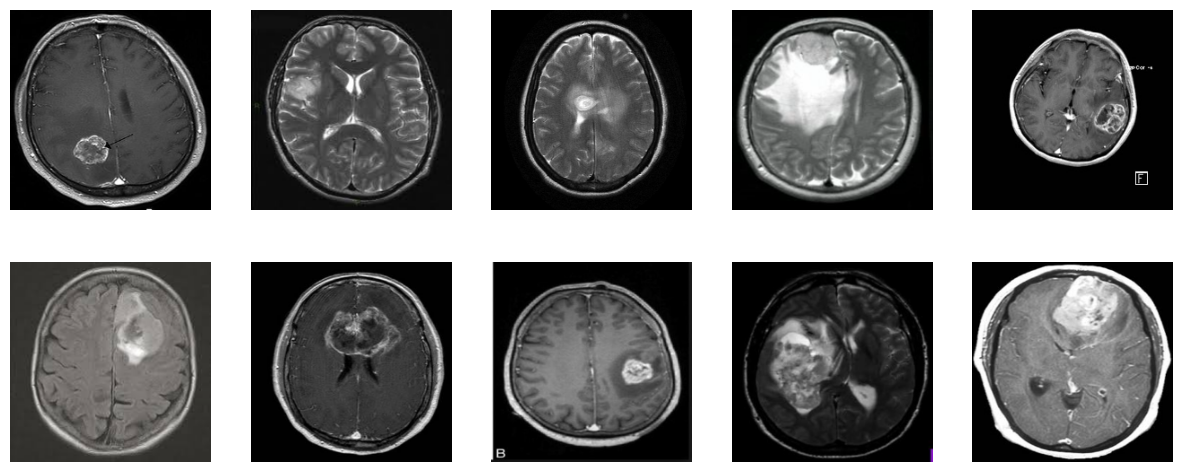

Shape of an image in X_train:  (224, 224, 3)
Shape of an image in X_test:  (224, 224, 3)
X_train Shape:  (169, 224, 224, 3)
X_test Shape:  (84, 224, 224, 3)
y_train Shape:  (169, 2)
y_test Shape:  (84, 2)
3/3 [==============================] - 11s 3s/step
Number of rows and columns in train_features: (169, 68993)
Number of rows and columns in test_features: (84, 68993)
Test Accuracy: 0.8452380952380952


In [ ]:

import tensorflow as tf
from zipfile import ZipFile
import os
import cv2
from tqdm.notebook import tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from keras.applications import efficientnet
import matplotlib.pyplot as plt

# Upload kaggle.json if not already done

file_name = "/content/archive (6).zip"
with ZipFile(file_name, 'r') as zip:
    zip.extractall()
    print('Done')

X = []
y = []

# Load images from '/content/yes' directory
os.chdir('/content/yes')
for i in tqdm(os.listdir()):
    img = cv2.imread(i)
    if img is not None:  # Check if img is not None
        img = cv2.resize(img, (224, 224))
        X.append(img)
        y.append(1)  # Assign label 1 for 'yes' class
    else:
        print(f"Error loading image: {i}")

# Load images from '/content/no' directory
os.chdir('/content/no')
for i in tqdm(os.listdir()):
    img = cv2.imread(i)
    if img is not None:  # Check if img is not None
        img = cv2.resize(img, (224, 224))
        X.append(img)
        y.append(0)  # Assign label 0 for 'no' class
    else:
        print(f"Error loading image: {i}")

# Display 10 images with tumor
print("Displaying 10 images with tumor:")
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    if y[i] == 1:
        ax.imshow(X[i])
        ax.axis('off')
plt.show()

# Prepare data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print("Shape of an image in X_train: ", X_train[0].shape)
print("Shape of an image in X_test: ", X_test[0].shape)

le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test)
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

# Feature extraction using EfficientNet
def extract_features(X):
    model = efficientnet.EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    features = model.predict(X)
    return features

# Extract features from images
X_train_features = extract_features(X_train)
X_test_features = extract_features(X_test)

# Flatten the feature arrays
X_train_features_flat = X_train_features.reshape(X_train_features.shape[0], -1)
X_test_features_flat = X_test_features.reshape(X_test_features.shape[0], -1)

# Save features and labels to a CSV file
train_data = pd.DataFrame(X_train_features_flat)
train_data['label'] = y_train.argmax(axis=1)
train_data.to_csv('train_features.csv', index=False)

test_data = pd.DataFrame(X_test_features_flat)
test_data['label'] = y_test.argmax(axis=1)
test_data.to_csv('test_features.csv', index=False)

# Read CSV files and display the number of rows and columns
train_features = pd.read_csv('train_features.csv')
test_features = pd.read_csv('test_features.csv')

# Show the number of rows and columns in train_features and test_features
print("Number of rows and columns in train_features:", train_features.shape)
print("Number of rows and columns in test_features:", test_features.shape)

# Train any model using features
from sklearn.ensemble import RandomForestClassifier

# Separate features and labels
X_train = train_features.drop('label', axis=1)
y_train = train_features['label']
X_test = test_features.drop('label', axis=1)
y_test = test_features['label']

# Initialize and train a RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
rf_classifier.fit(X_train, y_train)

# Evaluate model's accuracy
accuracy = rf_classifier.score(X_test, y_test)
print("Test Accuracy:", accuracy)


Done


  0%|          | 0/155 [00:00<?, ?it/s]

  0%|          | 0/103 [00:00<?, ?it/s]

Error loading image: brain_tumor_dataset
Error loading image: no
Error loading image: yes
Error loading image: test_features.csv
Error loading image: train_features.csv
Displaying 10 images with tumor:


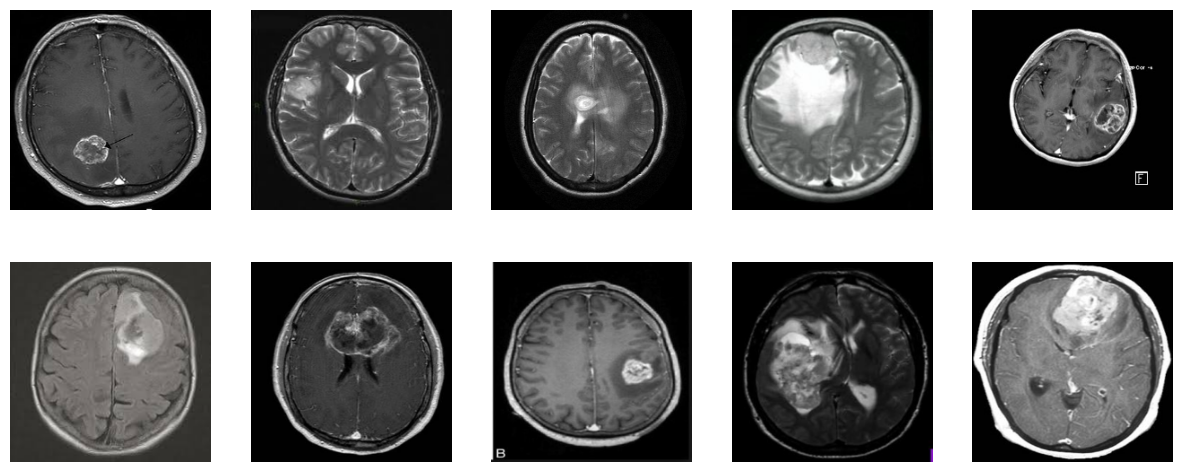

Shape of an image in X_train:  (224, 224, 3)
Shape of an image in X_test:  (224, 224, 3)
X_train Shape:  (169, 224, 224, 3)
X_test Shape:  (84, 224, 224, 3)
y_train Shape:  (169, 2)
y_test Shape:  (84, 2)
3/3 [==============================] - 10s 2s/step
Test Accuracy: 0.8452380952380952


In [ ]:
import tensorflow as tf
from zipfile import ZipFile
import os
import cv2
from tqdm.notebook import tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from keras.applications import densenet
import matplotlib.pyplot as plt

# Upload kaggle.json if not already done

file_name = "/archive (6).zip"
with ZipFile(file_name, 'r') as zip:
    zip.extractall()
    print('Done')

X = []
y = []

# Load images from '/content/yes' directory
os.chdir('/content/yes')
for i in tqdm(os.listdir()):
    img = cv2.imread(i)
    if img is not None:  # Check if img is not None
        img = cv2.resize(img, (224, 224))
        X.append(img)
        y.append(1)  # Assign label 1 for 'yes' class
    else:
        print(f"Error loading image: {i}")

# Load images from '/content/no' directory
os.chdir('/content/no')
for i in tqdm(os.listdir()):
    img = cv2.imread(i)
    if img is not None:  # Check if img is not None
        img = cv2.resize(img, (224, 224))
        X.append(img)
        y.append(0)  # Assign label 0 for 'no' class
    else:
        print(f"Error loading image: {i}")

# Display 10 images with tumor
print("Displaying 10 images with tumor:")
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    if y[i] == 1:
        ax.imshow(X[i])
        ax.axis('off')
plt.show()

# Prepare data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print("Shape of an image in X_train: ", X_train[0].shape)
print("Shape of an image in X_test: ", X_test[0].shape)

le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test)
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

# Feature extraction using DenseNet
def extract_features(X):
    model = densenet.DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    features = model.predict(X)
    return features

# Extract features from images
X_train_features = extract_features(X_train)
X_test_features = extract_features(X_test)

# Flatten the feature arrays
X_train_features_flat = X_train_features.reshape(X_train_features.shape[0], -1)
X_test_features_flat = X_test_features.reshape(X_test_features.shape[0], -1)

# Save features and labels to a CSV file
train_data = pd.DataFrame(X_train_features_flat)
train_data['label'] = y_train.argmax(axis=1)
train_data.to_csv('train_features.csv', index=False)

test_data = pd.DataFrame(X_test_features_flat)
test_data['label'] = y_test.argmax(axis=1)
test_data.to_csv('test_features.csv', index=False)

# Read CSV files
train_features = pd.read_csv('train_features.csv')
test_features = pd.read_csv('test_features.csv')

# Train any model using features
from sklearn.ensemble import RandomForestClassifier

# Separate features and labels
X_train = train_features.drop('label', axis=1)
y_train = train_features['label']
X_test = test_features.drop('label', axis=1)
y_test = test_features['label']

# Initialize and train a RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
rf_classifier.fit(X_train, y_train)

# Evaluate model's accuracy
accuracy = rf_classifier.score(X_test, y_test)
print("Test Accuracy:", accuracy)


Done


  0%|          | 0/155 [00:00<?, ?it/s]

  0%|          | 0/103 [00:00<?, ?it/s]

Error loading image: brain_tumor_dataset
Error loading image: no
Error loading image: yes
Error loading image: test_features.csv
Error loading image: train_features.csv
Displaying 10 images with tumor:


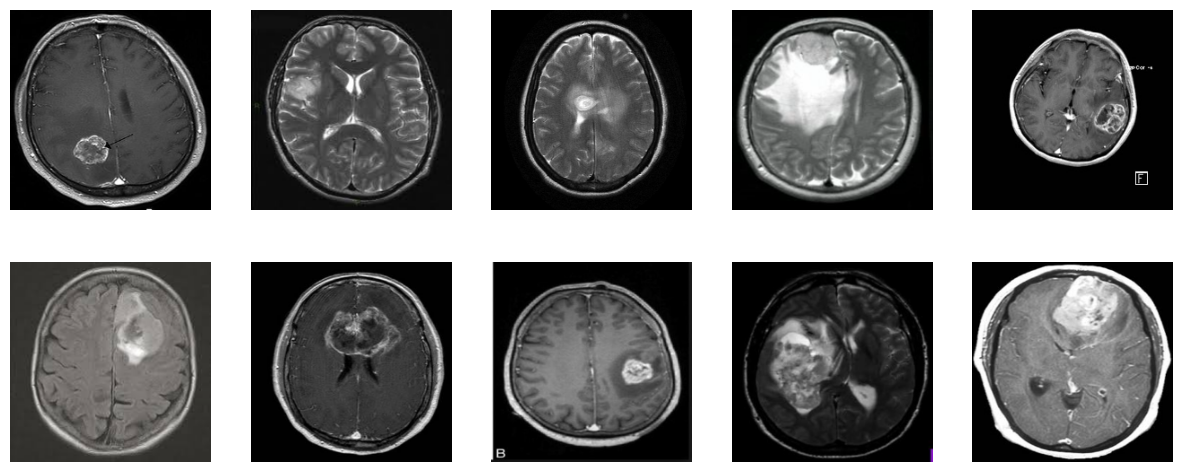

Shape of an image in X_train:  (224, 224, 3)
Shape of an image in X_test:  (224, 224, 3)
X_train Shape:  (169, 224, 224, 3)
X_test Shape:  (84, 224, 224, 3)
y_train Shape:  (169, 2)
y_test Shape:  (84, 2)
3/3 [==============================] - 4s 893ms/step
Test Accuracy: 0.8928571428571429


In [ ]:
import tensorflow as tf
from zipfile import ZipFile
import os
import cv2
from tqdm.notebook import tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from keras.applications import efficientnet
import matplotlib.pyplot as plt

# Upload kaggle.json if not already done

file_name = "/archive (6).zip"
with ZipFile(file_name, 'r') as zip:
    zip.extractall()
    print('Done')

X = []
y = []

# Load images from '/content/yes' directory
os.chdir('/content/yes')
for i in tqdm(os.listdir()):
    img = cv2.imread(i)
    if img is not None:  # Check if img is not None
        img = cv2.resize(img, (224, 224))
        X.append(img)
        y.append(1)  # Assign label 1 for 'yes' class
    else:
        print(f"Error loading image: {i}")

# Load images from '/content/no' directory
os.chdir('/content/no')
for i in tqdm(os.listdir()):
    img = cv2.imread(i)
    if img is not None:  # Check if img is not None
        img = cv2.resize(img, (224, 224))
        X.append(img)
        y.append(0)  # Assign label 0 for 'no' class
    else:
        print(f"Error loading image: {i}")

# Display 10 images with tumor
print("Displaying 10 images with tumor:")
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    if y[i] == 1:
        ax.imshow(X[i])
        ax.axis('off')
plt.show()

# Prepare data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print("Shape of an image in X_train: ", X_train[0].shape)
print("Shape of an image in X_test: ", X_test[0].shape)

le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test)
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

# Feature extraction using EfficientNet  n
def extract_features(X):
    model = efficientnet.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    features = model.predict(X)
    return features

# Extract features from images
X_train_features = extract_features(X_train)
X_test_features = extract_features(X_test)

# Flatten the feature arrays
X_train_features_flat = X_train_features.reshape(X_train_features.shape[0], -1)
X_test_features_flat = X_test_features.reshape(X_test_features.shape[0], -1)

# Save features and labels to a CSV file
train_data = pd.DataFrame(X_train_features_flat)
train_data['label'] = y_train.argmax(axis=1)
train_data.to_csv('train_features.csv', index=False)

test_data = pd.DataFrame(X_test_features_flat)
test_data['label'] = y_test.argmax(axis=1)
test_data.to_csv('test_features.csv', index=False)

# Read CSV files
train_features = pd.read_csv('train_features.csv')
test_features = pd.read_csv('test_features.csv')

# Train any model using features
from sklearn.ensemble import RandomForestClassifier

# Separate features and labels
X_train = train_features.drop('label', axis=1)
y_train = train_features['label']
X_test = test_features.drop('label', axis=1)
y_test = test_features['label']

# Initialize and train a RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
rf_classifier.fit(X_train, y_train)

# Evaluate model's accuracy
accuracy = rf_classifier.score(X_test, y_test)
print("Test Accuracy:", accuracy)


Done


  0%|          | 0/155 [00:00<?, ?it/s]

  0%|          | 0/103 [00:00<?, ?it/s]

Error loading image: brain_tumor_dataset
Error loading image: no
Error loading image: yes
Error loading image: test_features.csv
Error loading image: train_features.csv
Displaying 10 images with tumor:


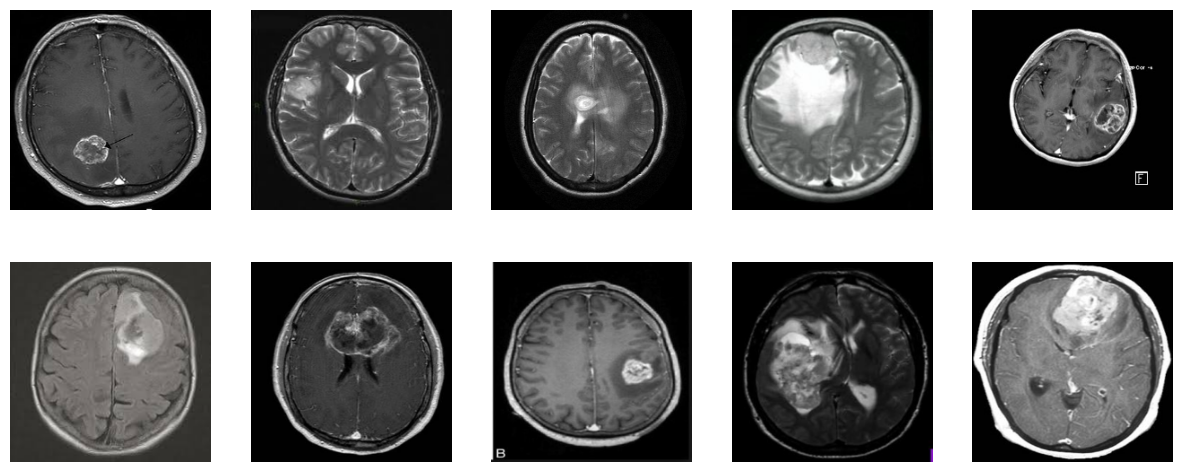

Shape of an image in X_train:  (224, 224, 3)
Shape of an image in X_test:  (224, 224, 3)
X_train Shape:  (169, 224, 224, 3)
X_test Shape:  (84, 224, 224, 3)
y_train Shape:  (169, 2)
y_test Shape:  (84, 2)
3/3 [==============================] - 4s 900ms/step
Test Accuracy: 0.8928571428571429


In [ ]:
import tensorflow as tf
from zipfile import ZipFile
import os
import cv2
from tqdm.notebook import tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from keras.applications import efficientnet
import matplotlib.pyplot as plt
from IPython.display import FileLink

# Upload kaggle.json if not already done

file_name = "/archive (6).zip"
with ZipFile(file_name, 'r') as zip:
    zip.extractall()
    print('Done')

X = []
y = []

# Load images from '/content/yes' directory
os.chdir('/content/yes')
for i in tqdm(os.listdir()):
    img = cv2.imread(i)
    if img is not None:  # Check if img is not None
        img = cv2.resize(img, (224, 224))
        X.append(img)
        y.append(1)  # Assign label 1 for 'yes' class
    else:
        print(f"Error loading image: {i}")

# Load images from '/content/no' directory
os.chdir('/content/no')
for i in tqdm(os.listdir()):
    img = cv2.imread(i)
    if img is not None:  # Check if img is not None
        img = cv2.resize(img, (224, 224))
        X.append(img)
        y.append(0)  # Assign label 0 for 'no' class
    else:
        print(f"Error loading image: {i}")

# Display 10 images with tumor
print("Displaying 10 images with tumor:")
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    if y[i] == 1:
        ax.imshow(X[i])
        ax.axis('off')
plt.show()

# Prepare data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print("Shape of an image in X_train: ", X_train[0].shape)
print("Shape of an image in X_test: ", X_test[0].shape)

le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test)
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

# Feature extraction using EfficientNet
def extract_features(X):
    model = efficientnet.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    features = model.predict(X)
    return features

# Extract features from images
X_train_features = extract_features(X_train)
X_test_features = extract_features(X_test)

# Flatten the feature arrays
X_train_features_flat = X_train_features.reshape(X_train_features.shape[0], -1)
X_test_features_flat = X_test_features.reshape(X_test_features.shape[0], -1)

# Save features and labels to a CSV file
train_data = pd.DataFrame(X_train_features_flat)
train_data['label'] = y_train.argmax(axis=1)
train_data.to_csv('train_features.csv', index=False)

test_data = pd.DataFrame(X_test_features_flat)
test_data['label'] = y_test.argmax(axis=1)
test_data.to_csv('test_features.csv', index=False)

# Provide download links for CSV files
train_link = FileLink('train_features.csv')
test_link = FileLink('test_features.csv')
train_link, test_link

# Read CSV files
train_features = pd.read_csv('train_features.csv')
test_features = pd.read_csv('test_features.csv')

# Train any model using features
from sklearn.ensemble import RandomForestClassifier

# Separate features and labels
X_train = train_features.drop('label', axis=1)
y_train = train_features['label']
X_test = test_features.drop('label', axis=1)
y_test = test_features['label']

# Initialize and train a RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
rf_classifier.fit(X_train, y_train)

# Evaluate model's accuracy
accuracy = rf_classifier.score(X_test, y_test)
print("Test Accuracy:", accuracy)


Done


  0%|          | 0/155 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

Displaying 10 images with tumor:


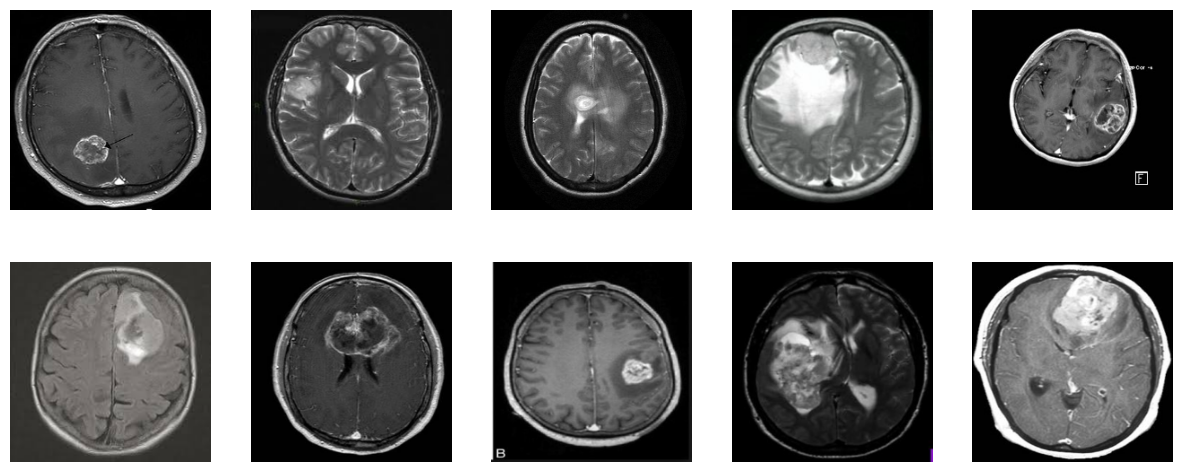

Shape of an image in X_train:  (224, 224, 3)
Shape of an image in X_test:  (224, 224, 3)
X_train Shape:  (169, 224, 224, 3)
X_test Shape:  (84, 224, 224, 3)
y_train Shape:  (169, 2)
y_test Shape:  (84, 2)
3/3 [==============================] - 7s 2s/step
Test Accuracy: 0.8809523809523809


In [ ]:
import tensorflow as tf
from zipfile import ZipFile
import os
import cv2
from tqdm.notebook import tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from keras.applications import inception_v3
import matplotlib.pyplot as plt

# Upload kaggle.json if not already done

file_name = "/archive (6).zip"
with ZipFile(file_name, 'r') as zip:
    zip.extractall()
    print('Done')

X = []
y = []

# Load images from '/content/yes' directory
os.chdir('/content/yes')
for i in tqdm(os.listdir()):
    img = cv2.imread(i)
    if img is not None:  # Check if img is not None
        img = cv2.resize(img, (224, 224))
        X.append(img)
        y.append(1)  # Assign label 1 for 'yes' class
    else:
        print(f"Error loading image: {i}")

# Load images from '/content/no' directory
os.chdir('/content/no')
for i in tqdm(os.listdir()):
    img = cv2.imread(i)
    if img is not None:  # Check if img is not None
        img = cv2.resize(img, (224, 224))
        X.append(img)
        y.append(0)  # Assign label 0 for 'no' class
    else:
        print(f"Error loading image: {i}")

# Display 10 images with tumor
print("Displaying 10 images with tumor:")
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    if y[i] == 1:
        ax.imshow(X[i])
        ax.axis('off')
plt.show()

# Prepare data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print("Shape of an image in X_train: ", X_train[0].shape)
print("Shape of an image in X_test: ", X_test[0].shape)

le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test)
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

# Feature extraction using InceptionV3
def extract_features(X):
    model = inception_v3.InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    features = model.predict(X)
    return features

# Extract features from images
X_train_features = extract_features(X_train)
X_test_features = extract_features(X_test)

# Flatten the feature arrays
X_train_features_flat = X_train_features.reshape(X_train_features.shape[0], -1)
X_test_features_flat = X_test_features.reshape(X_test_features.shape[0], -1)

# Save features and labels to a CSV file
train_data = pd.DataFrame(X_train_features_flat)
train_data['label'] = y_train.argmax(axis=1)
train_data.to_csv('train_features.csv', index=False)

test_data = pd.DataFrame(X_test_features_flat)
test_data['label'] = y_test.argmax(axis=1)
test_data.to_csv('test_features.csv', index=False)

# Read CSV files
train_features = pd.read_csv('train_features.csv')
test_features = pd.read_csv('test_features.csv')

# Train any model using features
from sklearn.ensemble import RandomForestClassifier

# Separate features and labels
X_train = train_features.drop('label', axis=1)
y_train = train_features['label']
X_test = test_features.drop('label', axis=1)
y_test = test_features['label']

# Initialize and train a RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
rf_classifier.fit(X_train, y_train)

# Evaluate model's accuracy
accuracy = rf_classifier.score(X_test, y_test)
print("Test Accuracy:", accuracy)


Done


  0%|          | 0/155 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

Displaying 10 images with tumor:


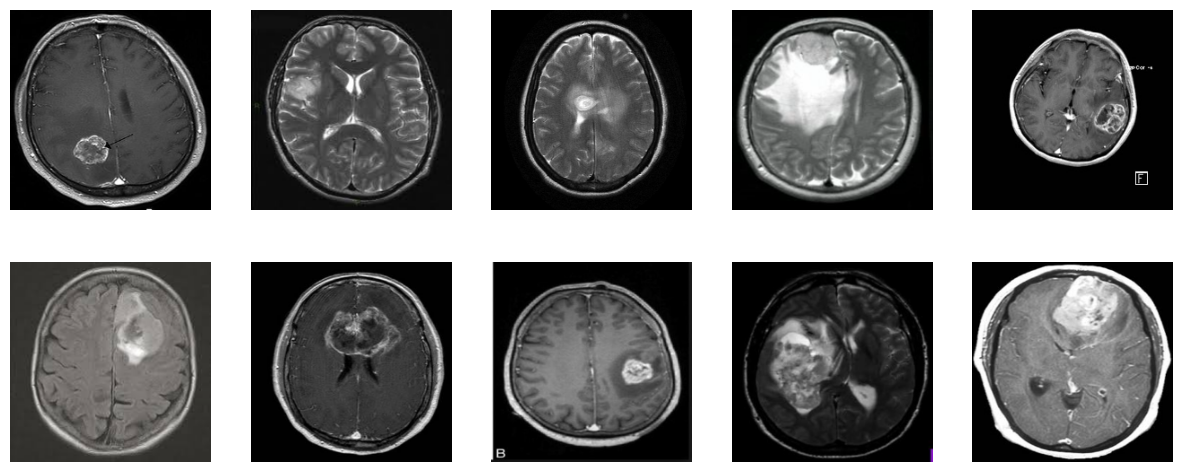

Shape of an image in X_train:  (224, 224, 3)
Shape of an image in X_test:  (224, 224, 3)
X_train Shape:  (169, 224, 224, 3)
X_test Shape:  (84, 224, 224, 3)
y_train Shape:  (169, 2)
y_test Shape:  (84, 2)
3/3 [==============================] - 49s 15s/step
Test Accuracy: 0.8690476190476191


In [ ]:
import tensorflow as tf
from zipfile import ZipFile
import os
import cv2
from tqdm.notebook import tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.applications import VGG16
import matplotlib.pyplot as plt

# Upload kaggle.json if not already done

file_name = "/content/archive (6).zip"
with ZipFile(file_name, 'r') as zip:
    zip.extractall()
    print('Done')

X = []
y = []

# Load images from '/content/yes' directory
os.chdir('/content/yes')
for i in tqdm(os.listdir()):
    img = cv2.imread(i)
    if img is not None:  # Check if img is not None
        img = cv2.resize(img, (224, 224))
        X.append(img)
        y.append(1)  # Assign label 1 for 'yes' class
    else:
        print(f"Error loading image: {i}")

# Load images from '/content/no' directory
os.chdir('/content/no')
for i in tqdm(os.listdir()):
    img = cv2.imread(i)
    if img is not None:  # Check if img is not None
        img = cv2.resize(img, (224, 224))
        X.append(img)
        y.append(0)  # Assign label 0 for 'no' class
    else:
        print(f"Error loading image: {i}")

# Display 10 images with tumor
print("Displaying 10 images with tumor:")
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    if y[i] == 1:
        ax.imshow(X[i])
        ax.axis('off')
plt.show()

# Prepare data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print("Shape of an image in X_train: ", X_train[0].shape)
print("Shape of an image in X_test: ", X_test[0].shape)

le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test)
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

# Feature extraction using VGG16
def extract_features(X):
    model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    features = model.predict(X)
    return features

# Extract features from images
X_train_features = extract_features(X_train)
X_test_features = extract_features(X_test)

# Flatten the feature arrays
X_train_features_flat = X_train_features.reshape(X_train_features.shape[0], -1)
X_test_features_flat = X_test_features.reshape(X_test_features.shape[0], -1)

# Save processed data to numpy arrays
np.save('X_train.npy', X_train)
np.save('X_test.npy', X_test)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)

# Save features and labels to a CSV file
train_data = pd.DataFrame(X_train_features_flat)
train_data['label'] = y_train.argmax(axis=1)
train_data.to_csv('train_features.csv', index=False)

test_data = pd.DataFrame(X_test_features_flat)
test_data['label'] = y_test.argmax(axis=1)
test_data.to_csv('test_features.csv', index=False)

# Read CSV files
train_features = pd.read_csv('train_features.csv')
test_features = pd.read_csv('test_features.csv')

# Train any model using features
from xgboost import XGBClassifier

# Separate features and labels
X_train = train_features.drop('label', axis=1)
y_train = train_features['label']
X_test = test_features.drop('label', axis=1)
y_test = test_features['label']

# Initialize and train a XGBoost model
xgb_classifier = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)
xgb_classifier.fit(X_train, y_train)

# Evaluate model's accuracy
accuracy = xgb_classifier.score(X_test, y_test)
print("Test Accuracy:", accuracy)


In [ ]:
import tensorflow as tf
from zipfile import ZipFile
import os
import cv2
from tqdm.notebook import tqdm
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# Extracting Dataset
file_name = "/content/archive (6).zip"
with ZipFile(file_name, 'r') as zip:
    zip.extractall()
    print('Done')

X = []
y = []

# Load images from '/content/yes' directory
os.chdir('/content/yes')
for i in tqdm(os.listdir()):
    img = cv2.imread(i)
    if img is not None:
        img = cv2.resize(img, (224, 224))
        X.append(img)
        y.append(1)  # Assign label 1 for 'yes' class
    else:
        print(f"Error loading image: {i}")

# Load images from '/content/no' directory
os.chdir('/content/no')
for i in tqdm(os.listdir()):
    img = cv2.imread(i)
    if img is not None:
        img = cv2.resize(img, (224, 224))
        X.append(img)
        y.append(0)  # Assign label 0 for 'no' class
    else:
        print(f"Error loading image: {i}")

# Prepare data
X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=10, validation_data=(X_test / 255.0, y_test))

# Evaluate model's accuracy
test_loss, test_acc = model.evaluate(X_test / 255.0, y_test)
print("Test Accuracy:", test_acc)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


OSError: [Errno 22] Invalid argument